In [ ]:
!pip install tensorflow==2.7

In [5]:
!nvidia-smi

Sun Apr 23 16:27:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [7]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/miniproject/train'
valid_path = '/content/drive/MyDrive/miniproject/test'

In [8]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
for layer in inception.layers:
    layer.trainable = False

In [10]:
folders = glob('/content/drive/MyDrive/miniproject/train/*')


In [11]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/miniproject/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1800 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/miniproject/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')


Found 96 images belonging to 4 classes.


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-0f3fcee075fe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
 47/113 [===========>..................] - ETA: 3:13 - loss: 4.1014 - accuracy: 0.6303

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


113/113 [==============================] - 361s 3s/step - loss: 3.5891 - accuracy: 0.6706 - val_loss: 3.8113 - val_accuracy: 0.6771
Epoch 2/15
113/113 [==============================] - 39s 345ms/step - loss: 1.7933 - accuracy: 0.8089 - val_loss: 3.1770 - val_accuracy: 0.7812
Epoch 3/15
113/113 [==============================] - 39s 345ms/step - loss: 1.4623 - accuracy: 0.8433 - val_loss: 1.9663 - val_accuracy: 0.8542
Epoch 4/15
113/113 [==============================] - 39s 346ms/step - loss: 1.3087 - accuracy: 0.8611 - val_loss: 2.6196 - val_accuracy: 0.8229
Epoch 5/15
113/113 [==============================] - 40s 351ms/step - loss: 1.7207 - accuracy: 0.8611 - val_loss: 2.7590 - val_accuracy: 0.8125
Epoch 6/15
113/113 [==============================] - 39s 348ms/step - loss: 1.3767 - accuracy: 0.8772 - val_loss: 2.8427 - val_accuracy: 0.7917
Epoch 7/15
113/113 [==============================] - 40s 351ms/step - loss: 1.3240 - accuracy: 0.8850 - val_loss: 3.4070 - val_accuracy: 0.833

In [17]:
import matplotlib.pyplot as plt

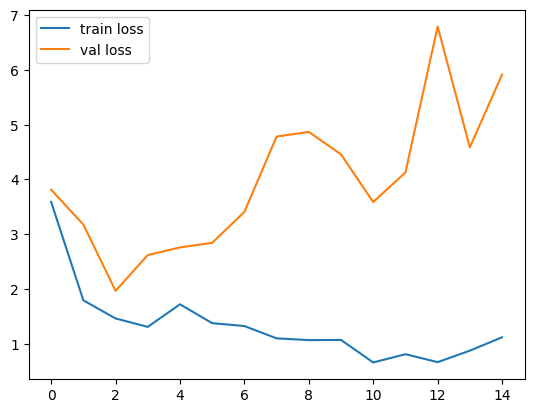

<Figure size 640x480 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


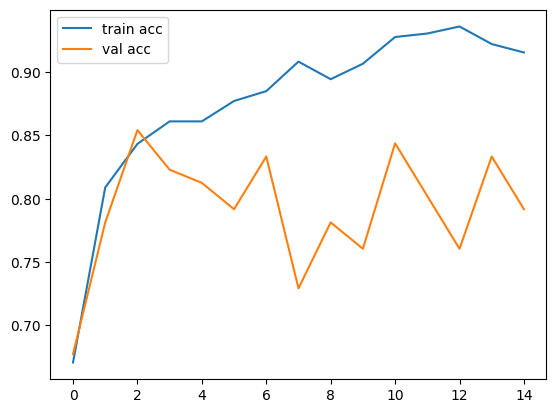

<Figure size 640x480 with 0 Axes>

In [24]:

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:


model.save('Image_classifier.h5') 
model = load_model('Image_classifier.h5')